In [1]:
# import the necessary packages
#from pyimagesearch import config
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import imutils
import shutil
import cv2
import os
import pandas as pd
from skimage.filters import threshold_otsu, threshold_mean, threshold_multiotsu
from pascal_voc_writer import Writer
import itertools
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [2]:
#BASE_PATH = '/Users/stefgielen/Documents/school 2021-2022/thesis/Python_Workspace/Oefenen/MaskRCNN/data'
#VAL_IMAGES_PATH = os.path.sep.join([BASE_PATH, "test/images"])
#print(VAL_IMAGES_PATH)
#VAL_ANNOTS_PATH = os.path.sep.join([BASE_PATH, "test/_annotations.csv"])
#print(VAL_ANNOTS_PATH)

BASE_PATH = '/Users/stefgielen/Documents/school 2021-2022/thesis/Python_Workspace/CustCNN'
DATA_PATH = os.path.sep.join([BASE_PATH, "Trimmeddata_bigger_test"])
VAL_IMAGES_PATH = os.path.sep.join([DATA_PATH, "test/images"])



print(VAL_IMAGES_PATH)

VAL_IMAGES_PATH= '/Users/stefgielen/Documents/school 2021-2022/thesis/Python_Workspace/CustCNN/Trimmeddata_bigger_test/test/images'

VAL_ANNOTS_PATH = os.path.sep.join([DATA_PATH, "test/_annotations.csv"])
print(VAL_ANNOTS_PATH)

CANNY = False
VOC = False #false geeft txt
SEGMENTATION = True

/Users/stefgielen/Documents/school 2021-2022/thesis/Python_Workspace/CustCNN/Trimmeddata_bigger_test/test/images
/Users/stefgielen/Documents/school 2021-2022/thesis/Python_Workspace/CustCNN/Trimmeddata_bigger_test/test/_annotations.csv


In [3]:
# load our trained bounding box regressor from disk
model = load_model("modeltestset_bigtest")


2022-05-24 19:41:34.761941: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=500)

In [4]:
#annotaties inladen

df=pd.read_csv(VAL_ANNOTS_PATH)
df = df.drop('class', axis=1)
df = df.drop('width', axis=1)
df = df.drop('height', axis=1)
df.head(5)

,filename,xmin,ymin,xmax,ymax
0,293e442438ebe3ae_jpg.rf.059af780b38cffec097999...,43,15,364,386
1,aa05dbe467400fbf_jpg.rf.136993704d04fdc6fb5c1b...,122,111,327,330
2,5c826816c70b0dec_jpg.rf.0629a7cbfa16af730e7f8b...,27,33,397,348
3,d32442c4e0c75b88_jpg.rf.073165b8c2896e53bc7843...,82,42,346,385
4,42ae41305ec3108f_jpg.rf.02a502233a61a91272a6bd...,75,3,349,369


In [5]:
"""# loop over the images that we'll be testing using our bounding box
# regression model
rows=[]
i = 0
for index, row in df.iterrows():
    i+=1
    #data uit annotaties halen

    filename, startX, startY, endX, endY = row
    rows.append(row) 

    imagePath = os.path.sep.join([VAL_IMAGES_PATH, filename])

    image = np.array(load_img(imagePath, target_size=(224, 224)))
   


    if CANNY:
            # make bounding box predictions on the input image's edge detection
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #1 kanaals maken
        blurred = cv2.GaussianBlur(gray, (3, 3), 0)    #blurren voor beter resultaat

            # Canny edge detection
        canny = cv2.Canny(blurred, 50, 180, 1)

        image = img_to_array(canny)
    
    
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    preds = model.predict(image)
    
    (startX, startY, endX, endY) = preds[0,:]
    
    
    
    #originele foto laden
    image = cv2.imread(imagePath)
    image = imutils.resize(image)
    (h, w) = image.shape[:2]
    #genormaliseerde predictions omzetten naar grootte foto
    startX = int(startX * w)
    startY = int(startY * h)
    endX = int(endX * w)
    endY = int(endY * h)
    
    df.at[index,:] = filename, startX, startY, endX, endY
    
    
    
    image = cv2.imread(imagePath)
    #bounding box tekenen op foto 
    #TODO aanpassen voor meerdere per foto
    cv2.rectangle(image, (startX, startY), (endX, endY),(0, 255, 0), 2)
    #write output naar predictions map
    
    filename = str(i)+'.jpg'
    path ='/Users/stefgielen/Documents/school 2021-2022/thesis/Python_Workspace/CustCNN/predictions'
    cv2.imwrite(os.path.join(path , filename), image)

df = df[["filename", "xmin", "ymax","xmax","ymin"]]
df.insert(1, "confidence", 0,True )
df.head(5)
df.to_csv(os.path.join(path , 'annotPred.csv'), index = False)"""

'# loop over the images that we\'ll be testing using our bounding box\n# regression model\nrows=[]\ni = 0\nfor index, row in df.iterrows():\n    i+=1\n    #data uit annotaties halen\n\n    filename, startX, startY, endX, endY = row\n    rows.append(row) \n\n    imagePath = os.path.sep.join([VAL_IMAGES_PATH, filename])\n\n    image = np.array(load_img(imagePath, target_size=(224, 224)))\n   \n\n\n    if CANNY:\n            # make bounding box predictions on the input image\'s edge detection\n        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #1 kanaals maken\n        blurred = cv2.GaussianBlur(gray, (3, 3), 0)    #blurren voor beter resultaat\n\n            # Canny edge detection\n        canny = cv2.Canny(blurred, 50, 180, 1)\n\n        image = img_to_array(canny)\n    \n    \n    image = img_to_array(image) / 255.0\n    image = np.expand_dims(image, axis=0)\n    preds = model.predict(image)\n    \n    (startX, startY, endX, endY) = preds[0,:]\n    \n    \n    \n    #originele foto

In [6]:
def segmentation(img, TYPE):
    if TYPE == 'kmeans':
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        twoDimage = img.reshape((-1,3))
        twoDimage = np.float32(twoDimage)

        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        K = 2
        attempts=10

        _,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
        
        center = np.uint8(center)
        label = label.flatten()
        segmented_image = center[label.flatten()]
        segmented_image = segmented_image.reshape(image.shape)
        # disable only the cluster number 2 (turn the pixel into black)
        masked_image = np.copy(image)
        # convert to the shape of a vector of pixel values
        masked_image = masked_image.reshape((-1, 3))
        # color (i.e cluster) to disable
        cluster = 2
        masked_image[label == cluster] = [0, 0, 0]
        # convert back to original shape
        result_image = masked_image.reshape(image.shape)
        
    elif TYPE == 'threshold':
        img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

        def filter_image(image, mask):
            r = image[:,:,0] * mask
            g = image[:,:,1] * mask
            b = image[:,:,2] * mask
            return np.dstack([r,g,b])

        thresh = threshold_otsu(img_gray)
        img_otsu  = img_gray < thresh
        result_image = filter_image(img, img_otsu)
    elif TYPE == 'Contour_Detection':
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        _,thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
        edges = cv2.dilate(cv2.Canny(thresh, 5, 20),None) 
        
            #vind contours in de foto, sorted zet grootste op plaats 0
        cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
        mask = np.zeros((img.shape[0],img.shape[1]), np.uint8)
        masked = cv2.drawContours(mask, [cnt],-1, 255, -1)
        
        result_image = cv2.bitwise_and(img, img, mask=mask)
        
    #cv2.imshow('canny', result_image)
    #cv2.waitKey(0)
    return result_image
        

In [7]:

def calculate_iou(box_1, box_2):
    poly_1 = Polygon(box_1)
    poly_2 = Polygon(box_2)
    iou = poly_1.intersection(poly_2).area / poly_1.union(poly_2).area
    return iou





In [13]:
import time 

ious = []
PRED_PATH = os.path.sep.join([BASE_PATH, 'predictions'])
PRED_PATH = os.path.sep.join([PRED_PATH, 'predtemp'])
PRED_PATH = '/Users/stefgielen/Documents/school 2021-2022/thesis/Python_Workspace/Resultaten/EigenModel/andereSegm/kmeans/Annotations'


tijden=0
i=0
j=0
for filename in os.listdir(VAL_IMAGES_PATH):
    i += 1
    #print(filename)
    #print(os.path.splitext(filename)[0])
    #print("foto nr: ",i,"\n", filename)
    image_path =  os.path.sep.join([VAL_IMAGES_PATH,filename])
    #print(downloaded_image_path)
    if filename != '.DS_Store':
        #print("foto nr: ",i)
        originalIm = load_img(image_path)
        image = np.array(load_img(image_path, target_size=(224, 224)))

        path ='/Users/stefgielen/Documents/school 2021-2022/thesis/Python_Workspace/Resultaten/EigenModel/andereSegm/kmeans/Images'
        if SEGMENTATION:
            begin = time.time()
            image = segmentation(image, 'kmeans')
            end = time.time()
            tijden = tijden + (end - begin)
            filenameB = str(i)+'_segm'+'.jpg'
            cv2.imwrite(os.path.join(path , filenameB), image)

        image = img_to_array(image) / 255.0
        image = np.expand_dims(image, axis=0)

        begin = time.time()
        preds = model.predict(image)
        #print(preds)
        end = time.time()
        #print(end-begin)
        tijden = tijden + (end - begin)
        (xmin, ymin, xmax, ymax) = preds[0,:]

        #prediction omzetten naar correcte grootte

        w, h = originalIm.size
        xmin = int(xmin * w)
        ymin = int(ymin * h)
        xmax = int(xmax * w)
        ymax = int(ymax * h)


        image = cv2.imread(image_path)
        #bounding box tekenen op foto 
        #TODO aanpassen voor meerdere per foto
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax),(0, 255, 0), 2)

        row = df.loc[df['filename'] == filename]
        row = row.to_numpy()
        if row.size != 0:
            startX = (row[0][1])
            startY = (row[0][2])
            endX= (row[0][3])
            endY= (row[0][4])


        box_1 = [[xmin, ymin], [xmax, ymin], [xmax, ymax], [xmin, ymax]]
        box_2 = [[startX, startY], [endX, startY], [endX, endY], [startX, endY]]

        iou = 0
        iou = calculate_iou(box_1, box_2)
        iou = (round(iou, 2))
        ious.append(iou)

        if iou > 0.9: 
            j=j+1
        cv2.rectangle(image, (int(startX), int(startY)), (int(endX), int(endY)),(0, 0, 255), 2)
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax),(0, 255, 0), 2)

        cv2.rectangle(image, (xmin,ymin+20), (xmin+70, ymin), (0,255,0), -1)
        cv2.putText(img=image,text=('IOU: '+str(iou)), org=(xmin+5, ymin+15), fontFace=cv2.FONT_HERSHEY_DUPLEX , fontScale=0.4, color=(0, 0, 0),thickness=1) 

        filenameIm = str(i)+'.jpg'

        path ='/Users/stefgielen/Documents/school 2021-2022/thesis/Python_Workspace/Resultaten/EigenModel/andereSegm/kmeans/Images'
        cv2.imwrite(os.path.join(path , filenameIm), image)


        """if VOC:
            annotation_path =  os.path.sep.join([PRED_PATH,(os.path.splitext(filename)[0]+'.xml')])
            writer = Writer(filename, w, h)

            # add objects (class, xmin, ymin, xmax, ymax)
            writer.addObject('Picture-frame', xmin, ymin, xmax, ymax)
            # write to file
            writer.save(annotation_path)"""
        
        annotation_path =  os.path.sep.join([PRED_PATH,(os.path.splitext(filename)[0]+'.txt')])
        file = open(annotation_path, 'w')
        file.write( " ".join(['Picture-frame', "1", str(xmin),  str(ymin), str(xmax), str(ymax)]))

        """for filenameB in os.listdir('/Users/stefgielen/Documents/school 2021-2022/thesis/Python_Workspace/CustCNN/MetricsData/groundThruth/New_Testset_GroundThruth/test'):
            filenameC = os.path.splitext(filenameB)[0]
            #print(filenameB)
            #print(os.path.splitext(filename)[0])
            OLDDIR = os.path.sep.join(['/Users/stefgielen/Documents/school 2021-2022/thesis/Python_Workspace/CustCNN/MetricsData/groundThruth/New_Testset_GroundThruth/test',filenameB])
            NEWDIR = '/Users/stefgielen/Documents/school 2021-2022/thesis/Python_Workspace/CustCNN/MetricsData/groundTruth_typevb'
            if os.path.splitext(filename)[0] == filenameC:
                print(filenameB)
                shutil.move(OLDDIR, NEWDIR)"""
annotation_path =  os.path.sep.join([PRED_PATH,(os.path.splitext(filename)[0]+'.txt')])
file = open(annotation_path, 'w')
file.write( " ".join(['Picture-frame', "1", str(xmin),  str(ymin), str(xmax), str(ymax)]))
tijden = tijden/i    
print(filename)
print(xmin,ymin,xmax,ymax)
#print(tijden)
#print(j)
#print(ious)


c9fcdc17b0fe09e3_jpg.rf.18b51d9004fec87a8a599bfb26e1f83e.jpg
62 7 392 361


101


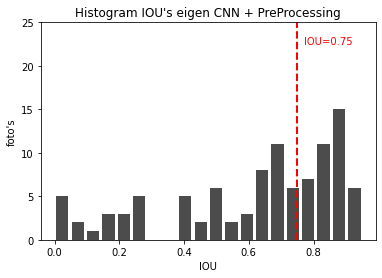

In [14]:
print(len(ious))
ious = np.array(ious)
plt.title("Histogram IOU's eigen CNN + PreProcessing")
plt.xlabel("IOU")
plt.ylabel("foto's")
plt.hist(x=ious, bins=20, color='#000000',
                            alpha=0.7, rwidth=0.8)
plt.axvline(0.75, color='r', linestyle='dashed', linewidth=2)
plt.text(0.77, 25*0.9, 'IOU=0.75',color='r')
plt.ylim(ymin=0, ymax = 25)
plt.show() 